In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv('./assets/raw/SP5_Abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.415,0.325,0.115,0.3285,0.1405,0.0510,0.106,12.0
1,0.0,0.610,0.470,0.145,1.1530,0.4030,0.2960,0.320,14.0
2,1.0,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.015,4.0
3,1.0,0.550,0.420,0.135,0.8160,0.3995,0.1485,0.230,12.0
4,2.0,0.485,0.355,0.120,0.5470,0.2150,0.1615,0.140,10.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3677 non-null   float64
 1   Length          3677 non-null   float64
 2   Diameter        3677 non-null   float64
 3   Height          3677 non-null   float64
 4   Whole weight    3677 non-null   float64
 5   Shucked weight  3677 non-null   float64
 6   Viscera weight  3677 non-null   float64
 7   Shell weight    3677 non-null   float64
 8   Rings           3677 non-null   float64
dtypes: float64(9)
memory usage: 258.7 KB


In [78]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,1.053576,0.524373,0.408113,0.139633,0.829556,0.360247,0.180669,0.239167,9.939625
std,0.820780,0.119955,0.099231,0.042335,0.493281,0.223983,0.109950,0.139968,3.218579
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.440500,0.185000,0.092000,0.129500,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.800500,0.336000,0.171000,0.232500,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.151000,0.503000,0.253500,0.330000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [79]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.037622,-0.039673,-0.043236,-0.018885,0.002742,-0.029993,-0.033427,-0.038833
Length,-0.037622,1.000000,0.987419,0.821204,0.926474,0.898995,0.905037,0.898026,0.553087
Diameter,-0.039673,0.987419,1.000000,0.827440,0.926347,0.893597,0.901319,0.905551,0.571577
Height,-0.043236,0.821204,0.827440,1.000000,0.813874,0.769431,0.793793,0.811193,0.550977
Whole weight,-0.018885,0.926474,0.926347,0.813874,1.000000,0.969545,0.966387,0.955933,0.537720
Shucked weight,0.002742,0.898995,0.893597,0.769431,0.969545,1.000000,0.932884,0.882771,0.418343
Viscera weight,-0.029993,0.905037,0.901319,0.793793,0.966387,0.932884,1.000000,0.906670,0.500625
Shell weight,-0.033427,0.898026,0.905551,0.811193,0.955933,0.882771,0.906670,1.000000,0.626553
Rings,-0.038833,0.553087,0.571577,0.550977,0.537720,0.418343,0.500625,0.626553,1.000000


In [80]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [81]:
cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

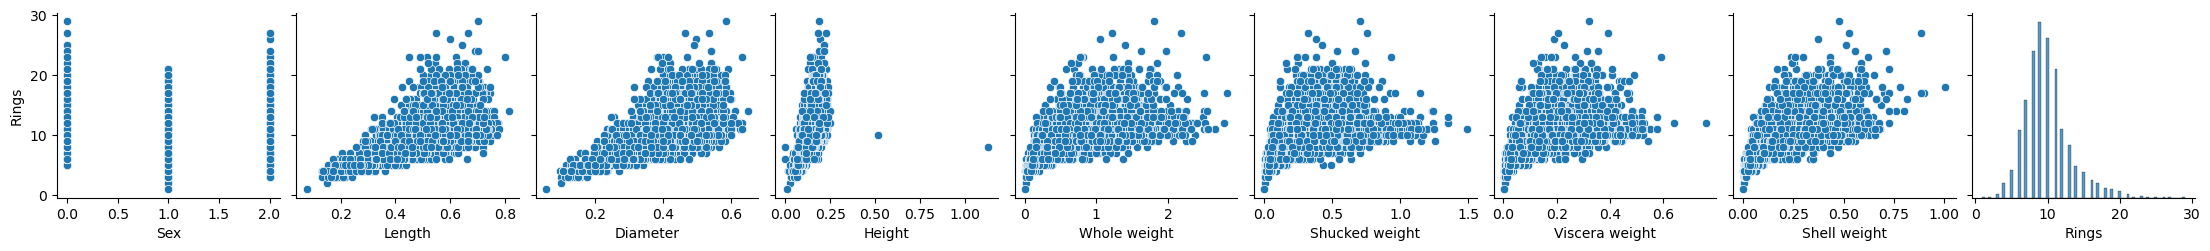

In [82]:
sb.pairplot(df, y_vars='Rings')

# Polynomic Regression

In [83]:
df = df.drop(columns=['Sex'])

x_values = df[cols].values
y_values = df['Rings'].values

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.30, random_state=42)

In [100]:
poly = PolynomialFeatures(degree=2)

x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test) 

In [101]:
lin_reg = LinearRegression()

lin_reg.fit(x_poly_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [102]:
predicts = lin_reg.predict(x_poly_test)

Predicts: [11.72159435  6.69885807  9.23064309  6.90750609], Current: [15.  8.  9.  6.]
Mean Square Error:  5.0180655463956905
R2 Score:  0.5488923829172363


<Axes: >

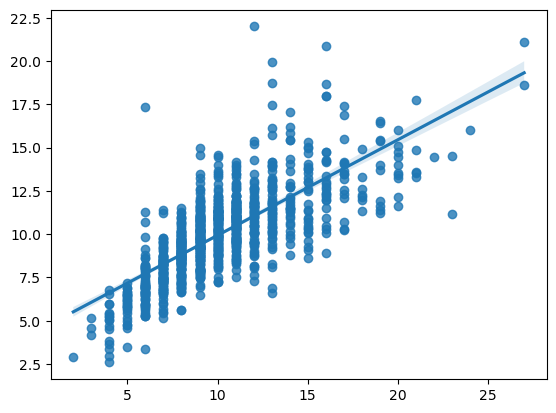

In [103]:
mse = mean_squared_error(y_test, predicts)
r2 = r2_score(y_test, predicts)

print("Predicts: {}, Current: {}".format(predicts[:4], y_test[:4]))
print("Mean Square Error: ", mse)
print("R2 Score: ", r2)

sb.regplot(x = y_test, y = predicts)